这个代码是为了辅助D:\LYW\pre10\utils_EEG\utils_sumtPermu.ipynb找cluster，
因为后面用R 代码并行 调用 mplus算的中介模型 存储出来的结果和 之前的mix effect model csv文件
结构不一样，你得更换变量名。。

## 先简单看一下数据情况

做初步的数据检查，看看有什么奇怪的地方。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# --------------------------------------------------
# 1. 载入数据
# --------------------------------------------------
file_path = r'C:\Users\Administrator\Downloads\combined_spatiotemporal_results.xlsx'   # 修改为你的实际路径
file_path = r"D:\LYW\R for permutation t\Mplus\results\all_spatiotemporal_results_WLSMV.csv"

# df = pd.read_excel(file_path)
df = pd.read_csv(file_path)

# Display basic information about the dataframe
print("DataFrame info:")
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nDescriptive statistics:")
print(df.describe())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   field_order           5369 non-null   int64  
 1   temporal_order        5369 non-null   int64  
 2   spatiotemporal_point  5369 non-null   object 
 3   a_estimate            5369 non-null   float64
 4   a_std_error           5369 non-null   float64
 5   a_z_value             5369 non-null   float64
 6   a_p_value             5369 non-null   float64
 7   b_estimate            5369 non-null   float64
 8   b_std_error           5369 non-null   float64
 9   b_z_value             5369 non-null   float64
 10  b_p_value             5369 non-null   float64
 11  ab_estimate           5369 non-null   float64
 12  ab_std_error          5369 non-null   int64  
 13  ab_z_value            5369 non-null   float64
 14  ab_p_value            5369 non-null   float64
 15  statu

In [16]:
# --------------------------------------------------
# 2. 显著性计数（p < 0.05）
# --------------------------------------------------
alpha = 0.05
n_total = len(df)

sig_counts = {
    'A' : (df['a_p_value']  < alpha).sum(),
    'B' : (df['b_p_value']  < alpha).sum(),
    'ab': (df['ab_p_value'] < alpha).sum()
}
sig_percent = {k: v / n_total * 100 for k, v in sig_counts.items()}

print("=== Significant points (p < 0.05) ===")
for k in sig_counts:
    print(f"Path {k}: {sig_counts[k]} / {n_total}  ({sig_percent[k]:.1f} %)")
print()


# ps，我想区分 a b ab 的正负情况。


=== Significant points (p < 0.05) ===
Path A: 2010 / 5369  (37.4 %)
Path B: 2936 / 5369  (54.7 %)
Path ab: 1071 / 5369  (19.9 %)



In [17]:
# Define significance threshold
alpha = 0.05

# First filter by significance, then check direction
sig_a = df[df['a_p_value'] < alpha]
sig_b = df[df['b_p_value'] < alpha]
sig_ab = df[df['ab_p_value'] < alpha]

# Count significant positive and negative effects
sig_pos_a = (sig_a['a_estimate'] > 0).sum()
sig_neg_a = (sig_a['a_estimate'] < 0).sum()

sig_pos_b = (sig_b['b_estimate'] > 0).sum()
sig_neg_b = (sig_b['b_estimate'] < 0).sum()

sig_pos_ab = (sig_ab['ab_estimate'] > 0).sum()
sig_neg_ab = (sig_ab['ab_estimate'] < 0).sum()

# Print results
print(f"=== Significant Path A (p < {alpha}) ===")
print(f"Total significant: {len(sig_a)}")
print(f"Positive: {sig_pos_a} ({sig_pos_a/len(sig_a)*100:.1f}% of significant)")
print(f"Negative: {sig_neg_a} ({sig_neg_a/len(sig_a)*100:.1f}% of significant)")
print()

print(f"=== Significant Path B (p < {alpha}) ===")
print(f"Total significant: {len(sig_b)}")
print(f"Positive: {sig_pos_b} ({sig_pos_b/len(sig_b)*100:.1f}% of significant)")
print(f"Negative: {sig_neg_b} ({sig_neg_b/len(sig_b)*100:.1f}% of significant)")
print()

print(f"=== Significant Path AB (p < {alpha}) ===")
print(f"Total significant: {len(sig_ab)}")
print(f"Positive: {sig_pos_ab} ({sig_pos_ab/len(sig_ab)*100:.1f}% of significant)")
print(f"Negative: {sig_neg_ab} ({sig_neg_ab/len(sig_ab)*100:.1f}% of significant)")

=== Significant Path A (p < 0.05) ===
Total significant: 2010
Positive: 396 (19.7% of significant)
Negative: 1614 (80.3% of significant)

=== Significant Path B (p < 0.05) ===
Total significant: 2936
Positive: 1323 (45.1% of significant)
Negative: 1613 (54.9% of significant)

=== Significant Path AB (p < 0.05) ===
Total significant: 1071
Positive: 298 (27.8% of significant)
Negative: 146 (13.6% of significant)


In [6]:

# --------------------------------------------------
# 3. 描述性统计
# --------------------------------------------------
numeric_cols = [
    'a_estimate','a_std_error','a_z_value','a_p_value',
    'b_estimate','b_std_error','b_z_value','b_p_value',
    'ab_estimate','ab_std_error','ab_z_value','ab_p_value'
]

desc = df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T
print("=== Descriptive statistics ===")
print(desc.round(3))
print()


=== Descriptive statistics ===
               mean  median    std    min    max
a_estimate   -0.002  -0.001  0.004 -0.016  0.015
a_std_error   0.002   0.002  0.000  0.001  0.003
a_z_value    -0.675  -0.478  1.671 -6.513  5.877
a_p_value     0.361   0.276  0.328  0.000  1.000
b_estimate   -0.010  -0.010  0.070 -0.299  0.258
b_std_error   0.038   0.037  0.003  0.030  0.044
b_z_value    -0.259  -0.257  1.881 -8.200  6.877
b_p_value     0.332   0.237  0.310  0.000  0.999
ab_estimate   0.000   0.000  0.000 -0.001  0.004
ab_std_error  0.000   0.000  0.000  0.000  0.001
ab_z_value    0.078   0.029  0.889 -2.820  4.431
ab_p_value    0.557   0.591  0.285  0.000  1.000



=== Significant counts per field ===
             A_sig  B_sig  ab_sig
field_order                      
0               19     26       1
1               21     25       4
2               35     22       2
3               17     28       1
4               18     25       1
5               51     31       7
6               18     20       0
7                8     23       0
8               22     40       5
9               14     30       2
10              27      9       2
11              17     20       0
12              34     10       0
13              31     30       5
14              15     36       1
15              15     30       0
16              17     27       2
17              32     21      12
18              30     15       0
19              28     21       2
20              15     33       3
21              22     10       0
22              47      6       0
23              24     21       4
24              32     24       4
25              32     37       9
26         

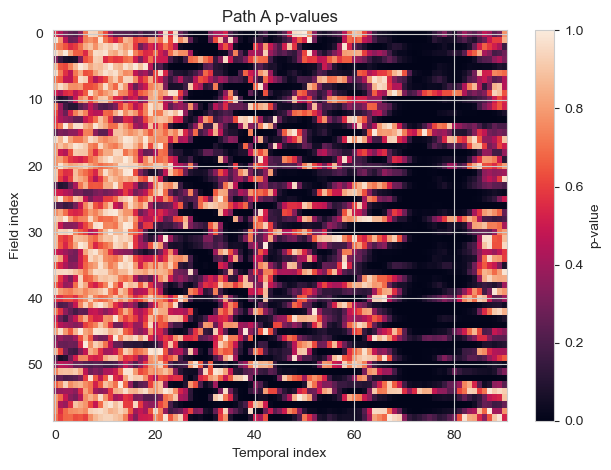

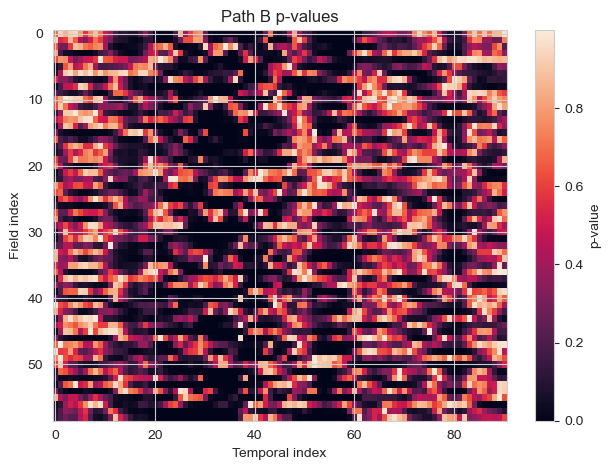

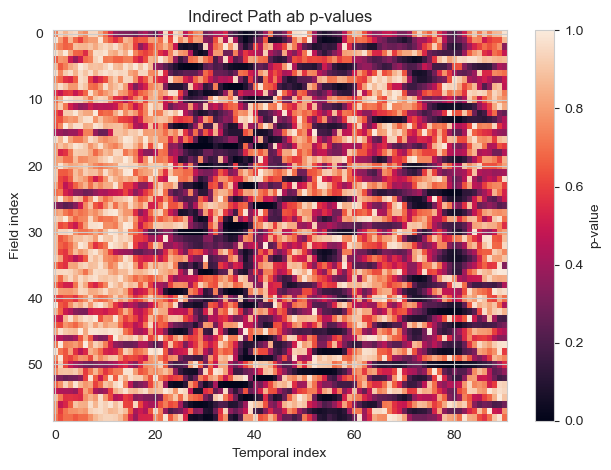

In [8]:

# --------------------------------------------------
# 4. 空间 / 时间 显著性分布
# --------------------------------------------------
spatial = pd.DataFrame({
    'A_sig' : (df['a_p_value']  < alpha).groupby(df['field_order']).sum(),
    'B_sig' : (df['b_p_value']  < alpha).groupby(df['field_order']).sum(),
    'ab_sig': (df['ab_p_value'] < alpha).groupby(df['field_order']).sum()
})
print("=== Significant counts per field ===")
print(spatial)
print()

temporal = pd.DataFrame({
    'A_sig' : (df['a_p_value']  < alpha).groupby(df['temporal_order']).sum(),
    'B_sig' : (df['b_p_value']  < alpha).groupby(df['temporal_order']).sum(),
    'ab_sig': (df['ab_p_value'] < alpha).groupby(df['temporal_order']).sum()
})
print("=== Significant counts per temporal point ===")
print(temporal)
print()

# --------------------------------------------------
# 5. 可视化：每条路径的 p-value 热图
#    （不指定 colormap，遵循默认；每幅图单独绘制）
# --------------------------------------------------
def plot_heatmap(pivot, title):
    plt.figure()
    plt.title(title)
    plt.imshow(pivot.values, aspect='auto')
    plt.colorbar(label='p-value')
    plt.xlabel('Temporal index')
    plt.ylabel('Field index')
    plt.tight_layout()
    plt.show()

# plot_heatmap(df.pivot('field_order', 'temporal_order', 'a_p_value'),
#              'Path A p-values')
# 
# plot_heatmap(df.pivot('field_order', 'temporal_order', 'b_p_value'),
#              'Path B p-values')
# 
# plot_heatmap(df.pivot('field_order', 'temporal_order', 'ab_p_value'),
#              'Indirect Path ab p-values')


plot_heatmap(df.pivot(index='field_order', columns='temporal_order', values='a_p_value'),
             'Path A p-values')

plot_heatmap(df.pivot(index='field_order', columns='temporal_order', values='b_p_value'),
             'Path B p-values')

plot_heatmap(df.pivot(index='field_order', columns='temporal_order', values='ab_p_value'),
             'Indirect Path ab p-values')


## 把 a b ab 拆成单个，符合相同结构的

后面找cluster的代码 columns 名字是写死的。


### ab
ab显著为正 - a显著为负，b显著为负数。
你需要的是这个组合得到的ab的表格。



ab显著为正  a显著为负，b显著为负数。
1 先筛选，筛除的把p变成1 
2 修改名字，把ab相关的改成代码识别的名字



field_order
temporal_order
coef_estimate
std_error
convergence
singular
warnings
n_rows
n_wordPairs
t_value
p_value
df



field_order
temporal_order
spatiotemporal_point
a_estimate
a_std_error
a_z_value
a_p_value
b_estimate
b_std_error
b_z_value
b_p_value
ab_estimate
ab_std_error
ab_z_value
ab_p_value
status

ab_estimate 改成 coef_estimate
ab_std_error 改成 std_error
ab_z_value 改成 t_value
ab_p_value 改成 p_value

In [ ]:
# --------------------------------------------------
# 6. 筛选条件：ab显著为正，a显著为负，b显著为负
# 将不符合条件的p值设为1，并修改列名
# --------------------------------------------------

# 设置显著性水平
alpha = 0.05

# 创建符合条件的掩码：ab显著为正，a显著为负，b显著为负
mask = (df['ab_p_value'] < alpha) & (df['ab_estimate'] > 0) & \
       (df['a_p_value'] < alpha) & (df['a_estimate'] < 0) & \
       (df['b_p_value'] < alpha) & (df['b_estimate'] < 0)

# 将不符合条件的p值设为1
df_filtered = df.copy()
df_filtered.loc[~mask, 'ab_p_value'] = 1

# 统计符合条件的记录数
num_records = mask.sum()
print(f"符合条件的记录数: {num_records} / {len(df)} ({num_records/len(df)*100:.2f}%)")

# 修改列名
df_filtered = df_filtered.rename(columns={
    'ab_estimate': 'coef_estimate',
    'ab_std_error': 'std_error',
    'ab_z_value': 't_value',
    'ab_p_value': 'p_value'
})

# 显示前几行结果
print("\n筛选后的数据前几行:")
print(df_filtered[['spatiotemporal_point', 'a_estimate', 'a_p_value', 
                   'b_estimate', 'b_p_value', 'coef_estimate', 'p_value']].head())

# 检查列名是否修改成功
print("\n修改后的列名:")
print(df_filtered.columns.tolist())



In [ ]:
'''

保存为csv文件

参考列明：
csv_files = ["D:\LYW\pre10\data\permutation_summary_between\summary_results_2024年11月14日_upaded.csv"]

类似这样的文件名，需要修改 日期，同时加上 ab 这个标志

'''

# --------------------------------------------------
# 7. 保存为CSV文件
# --------------------------------------------------
from datetime import datetime

# 获取当前日期并格式化为中文年月日格式
current_date = datetime.now().strftime("%Y年%m月%d日")

# 构建文件名
output_file = f"D:\\LYW\\pre10\\data\\permutation_summary_between\\summary_results_{current_date}_ab_updated.csv"

# 保存为CSV文件
df_filtered.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n已保存筛选后的数据到文件:\n{output_file}")


### a

idea：不需要进行筛选，只需要改column名字就行。

后面的代码应该是会自动根据 p值找cluster的，

你担心的是正反一起找？弄到一个cluster里？

In [20]:
# --------------------------------------------------
# 只修改a相关的列名，然后保存为CSV文件
# --------------------------------------------------

# 创建一个数据副本
df_a = df.copy()

# 修改a相关的列名
df_a = df_a.rename(columns={
    'a_estimate': 'coef_estimate',
    'a_std_error': 'std_error',
    'a_z_value': 't_value',
    'a_p_value': 'p_value'
})

# 显示前几行结果
print("\n修改列名后的数据前几行:")
print(df_a[['spatiotemporal_point', 'coef_estimate', 'std_error', 
           't_value', 'p_value']].head())

# 检查列名是否修改成功
print("\n修改后的列名:")
print(df_a.columns.tolist())

# --------------------------------------------------
# 保存为CSV文件
# --------------------------------------------------
from datetime import datetime

# 获取当前日期并格式化为中文年月日格式
current_date = datetime.now().strftime("%Y年%m月%d日")

# 构建文件名
output_file = f"D:\\LYW\\pre10\\data\\permutation_summary_between\\summary_results_{current_date}_a_updated.csv"

# 保存为CSV文件
df_a.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n已保存修改列名后的数据到文件:\n{output_file}")


修改列名后的数据前几行:
  spatiotemporal_point  coef_estimate  std_error  t_value  p_value
0               f00t00          0.002      0.004    0.402    0.688
1               f01t00          0.000      0.004   -0.015    0.988
2               f02t00          0.001      0.003    0.215    0.830
3               f03t00          0.000      0.003    0.031    0.976
4               f04t00          0.002      0.003    0.759    0.448

修改后的列名:
['field_order', 'temporal_order', 'spatiotemporal_point', 'coef_estimate', 'std_error', 't_value', 'p_value', 'b_estimate', 'b_std_error', 'b_z_value', 'b_p_value', 'ab_estimate', 'ab_std_error', 'ab_z_value', 'ab_p_value', 'status']

已保存修改列名后的数据到文件:
D:\LYW\pre10\data\permutation_summary_between\summary_results_2025年05月29日_a_updated.csv
